In [1]:
from tqdm import tqdm
from pathlib import Path
from datetime import datetime
import os
import json
import argparse

import numpy as np

import gym
import matplotlib.pyplot as plt

from agent.agent import Agent
from agent.tabular_agent import TabularAgent
from envs.random_maze import RandomMaze

# Tabular Agent


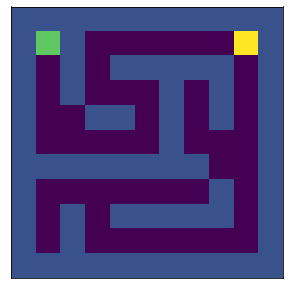

In [2]:
env = RandomMaze(5, 2, 10)

# Observation and action sizes
img = False
if len(env.observation_space.shape) == 0:
    ob_dim = env.observation_space.n
elif not img:
    ob_dim = int(np.prod(env.observation_space.shape))
else:
    ob_dim = env.observation_space.shape 

agent_params = {}

agent_params['input_dim'] = ob_dim
agent_params['action_dim'] = env.action_space.n 
agent_params['epsilon'] = 0.1
agent_params['gamma'] = 0.95
agent_params['step_size'] = 0.25

env.showPNG()

In [3]:

# num_runs = 10
# time_steps = 100000
# rs = np.zeros([num_runs,time_steps])
# for r in tqdm(range(num_runs)):
#     agent = TabularAgent(agent_params)
#     obs = env.reset()
#     for i in range(time_steps):
#         action = agent.act(obs)
#         next_obs, reward, done, _ = env.step(action)
#         rs[r, i] = reward
#         # if reward == 1:
#         #     print(1)

#         agent.train_step(obs, action, reward, next_obs, done)

#         obs = next_obs
#         if done: # end of episode
#             obs = env.reset()

In [4]:
# obs = env.reset()
# for i in range(20):
#     action = agent.act_evaluate(obs)
#     next_obs, reward, done, _ = env.step(action)

#     agent.train_step(obs, action, reward, next_obs, done)

#     env.showPNG()
#     obs = next_obs
#     if done: # end of episode
#         obs = env.reset()

In [5]:

# mean = np.mean(rs, axis=0)
# N = 100
# plt.plot(np.convolve(mean, np.ones(N)/N, mode='valid'))

# DQNN

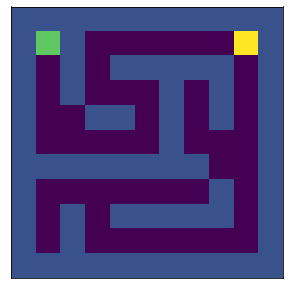

In [6]:
env = RandomMaze(5, 2, 10, state_representation='flat_grid')

# Observation and action sizes
img = False
if len(env.observation_space.shape) == 0:
    ob_dim = env.observation_space.n
elif not img:
    ob_dim = int(np.prod(env.observation_space.shape))
else:
    ob_dim = env.observation_space.shape 


agent_params = {}

agent_params['input_dim'] = ob_dim
agent_params['action_dim'] = env.action_space.n 
agent_params['epsilon'] = 0.1
agent_params['gamma'] = 0.95
agent_params['tau'] = 1
agent_params['model_arch'] = 'FFN'
agent_params['buffer_size'] = 10000
agent_params['batch_size'] = 64
agent_params['learning_rate'] = 0.01
agent_params['target_update_freq'] = 1
agent_params['learning_freq'] = 1
agent_params['learning_starts'] = 1000

env.showPNG()

In [7]:
num_runs = 1
time_steps = 100000
rs2 = np.zeros([num_runs,time_steps])
for r in tqdm(range(num_runs)):
    agent = Agent(agent_params)
    obs = env.reset()
    for i in range(time_steps):
        action = agent.act(obs)
        next_obs, reward, done, _ = env.step(action)
        rs2[r, i] = reward

        agent.train_step(obs, action, reward, next_obs, done)

        obs = next_obs
        if done: # end of episode
            obs = env.reset()

.90it/s]
  0%|          | 0/10 [00:47<?, ?it/s]


KeyboardInterrupt: 